# Student Family Income Regression and Multi-Class Grade Classification
This notebook covers two tasks:
1. Predicting a student's family income using regression.
2. Predicting a student's grade (A, B, C, D) using multi-class classification.

## Import Libraries

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Load Data

In [48]:
import os
import pandas as pd

csv_path = 'student_dataset.csv'
if not os.path.exists(csv_path):
    print(f"File '{csv_path}' not found. Please check the file path and ensure the file is in the correct directory.")
else:
    df = pd.read_csv(csv_path)
    display(df.head())
# Convert Part_Time_Job to numeric: Yes=1, No=0
    df['Part_Time_Job'] = df['Part_Time_Job'].map({'Yes': 1, 'No': 0})

,Student_ID,Age,Gender,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Part_Time_Job,Final_Score
0,1,24,Female,3.6,55.1,7.58,67280,Yes,94.2
1,2,21,Female,6.2,83.2,6.61,99459,No,88.5
2,3,22,Male,2.2,50.3,8.98,36779,No,96.7
3,4,24,Female,1.1,58.0,6.35,83932,No,82.2
4,5,20,Male,2.7,77.4,7.19,92936,No,74.9


# 1. Regression: Predict Family Income

### Select features and target for regression

In [49]:
features_reg = ['Age', 'Hours_Studied', 'Attendance_Rate', 'Part_Time_Job', 'Previous_Sem_CGPA']
X_reg = df[features_reg]
y_reg = df['Family_Income']

### Split data for regression

In [50]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

### Train Random Forest Regressor and predict

In [51]:
reg = RandomForestRegressor(random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)
print('R² Score:', r2_score(yr_test, yr_pred))
# print('RMSE:', mean_squared_error(yr_test, yr_pred, squared=False))

R² Score: -0.2547586615474795


# 2. Multi-Class Classification: Predict Grade (A, B, C, D)

### Create Grade column

In [52]:
def grade_from_score(score):
    if score >= 85: return 'A'
    elif score >= 70: return 'B'
    elif score >= 50: return 'C'
    else: return 'D'
df['Grade'] = df['Final_Score'].apply(grade_from_score)
df['Grade'].value_counts()

Grade
A    28
C    28
D    26
B    18
Name: count, dtype: int64

### Select features and target for classification

In [53]:
features_clf = ['Hours_Studied', 'Attendance_Rate', 'Previous_Sem_CGPA']
X_clf = df[features_clf]
y_clf = df['Grade']

### Split data for classification

In [54]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

### Train Random Forest Classifier and predict

In [45]:
clf = RandomForestClassifier(random_state=42)
clf.fit(Xc_train, yc_train)
yc_pred = clf.predict(Xc_test)
print('Accuracy:', accuracy_score(yc_test, yc_pred))
print(classification_report(yc_test, yc_pred))

Accuracy: 0.35
              precision    recall  f1-score   support

           A       0.50      0.60      0.55         5
           B       0.33      0.33      0.33         3
           C       0.40      0.29      0.33         7
           D       0.17      0.20      0.18         5

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.36      0.35      0.35        20



### Plot confusion matrix for grades

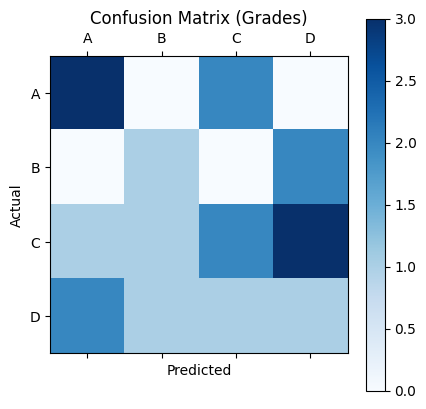

In [55]:
cm = confusion_matrix(yc_test, yc_pred, labels=['A','B','C','D'])
plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix (Grades)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(range(4), ['A','B','C','D'])
plt.yticks(range(4), ['A','B','C','D'])
plt.colorbar()
plt.show()